In [3]:
import os
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import me_data_fcts as df
sys.path.append("../meim/")
import generate_pareto_set as pareto

# ME IM

In [4]:
exp_folder = "/home/leni/remote-folder/meim/"


In [6]:
parent_fits = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = df.load_fitness(exp_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","number new inds","parent 1","parent 2","fitness","replicate"])



meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


/tmp/ipykernel_90656/1323565887.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
/tmp/ipykernel_90656/1323565887.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')


<Axes: xlabel='iteration', ylabel='fitness'>

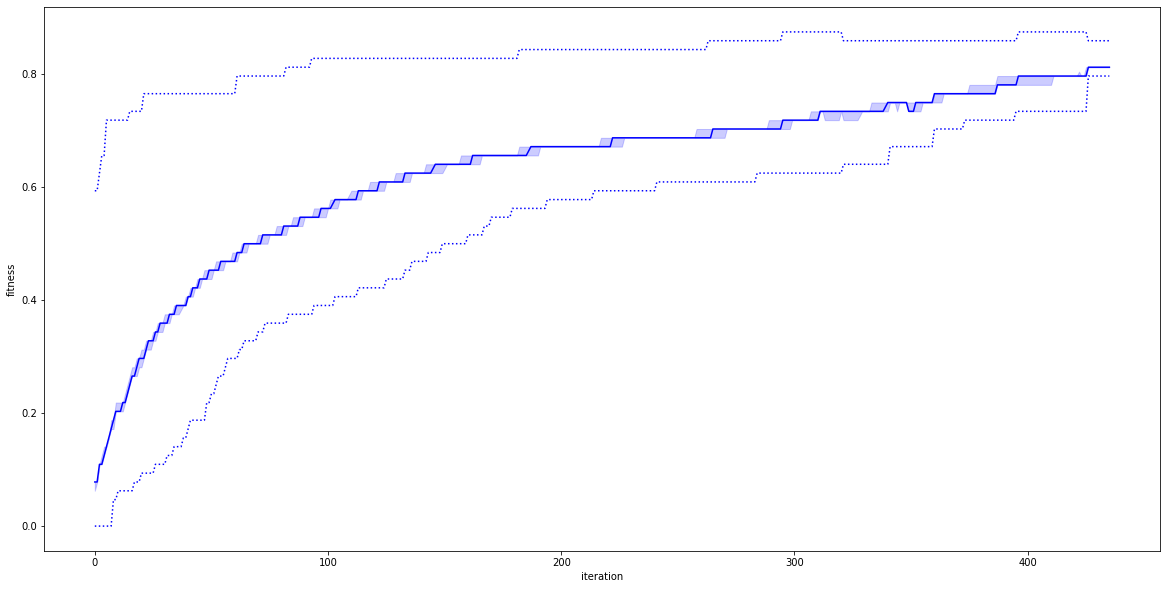

In [7]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=par_fit_data,x="iteration",y="fitness",estimator=np.median,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')



In [9]:
parent_descs = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_descriptor(exp_folder + "/" + folder + "/morph_features.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x1440 with 0 Axes>

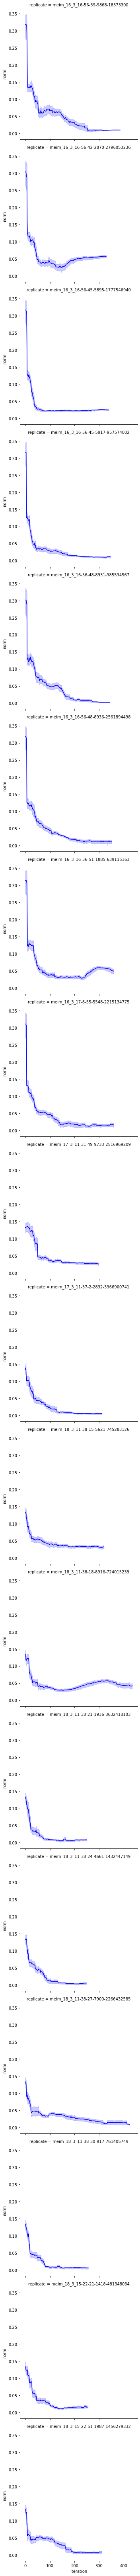

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.relplot(data=par_desc_data,kind="line",x="iteration",y="norm",estimator=np.std,color='b',row="replicate")

In [11]:
new_data_list = []
for rep in par_desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = par_desc_data.loc[par_desc_data["replicate"]==rep]
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


In [12]:
#std_data.reset_index()
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index  number new inds     width     depth  \
0             0    66.250558              0.0  0.126623  0.122700   
1             1    72.039054              0.0  0.126623  0.122700   
2             2    75.375967              0.0  0.126623  0.122700   
3             3    77.263746              0.0  0.126623  0.122700   
4             4    78.657197              0.0  0.125617  0.121392   
...         ...          ...              ...       ...       ...   
5936        306  2628.238179              0.0  0.001580  0.002331   
5937        307  2693.153631              0.0  0.001580  0.002331   
5938        308  2736.994361              0.0  0.001580  0.002331   
5939        309  2759.187247              0.0  0.001580  0.002331   
5940        310  2780.898805              0.0  0.001580  0.002331   

            height        voxels    wheels  sensors    joints   casters  \
0     1.544837e-01  2.335010e-01  0.120137      0.0  0.195317  0.124119   
1     1.544837e-01  2

/tmp/ipykernel_90656/3509515378.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
/tmp/ipykernel_90656/3509515378.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')


Text(0, 0.5, 'Morphological diversity')

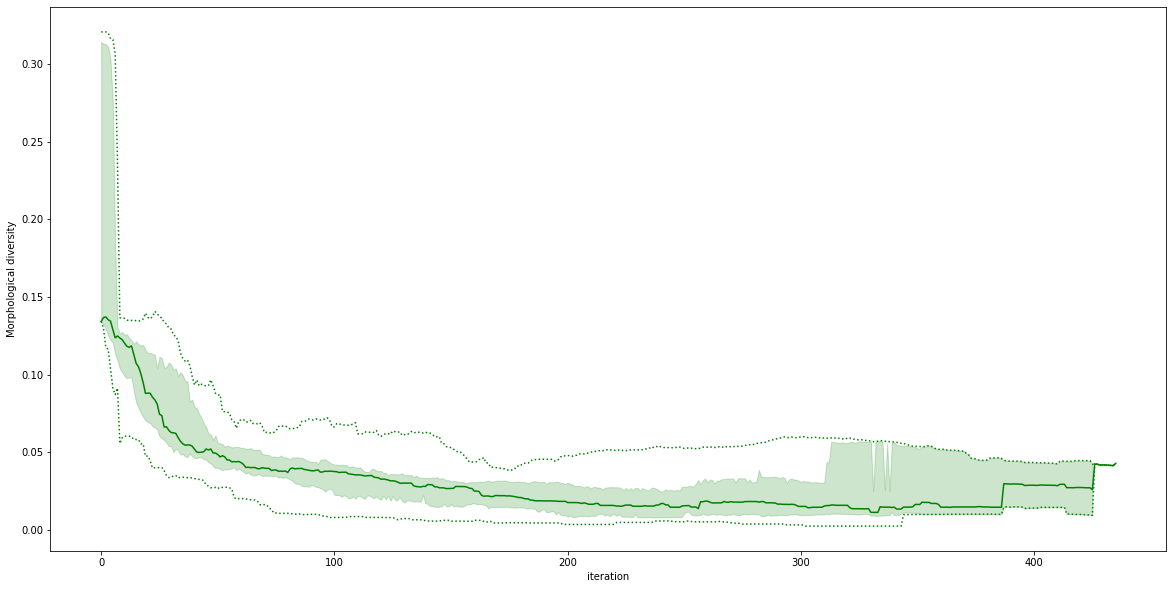

In [13]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological diversity")

# ME FC

In [2]:
exp_folder = "/media/leni/DATADRIVE1/are-logs/mefc/"

In [3]:
parent_fits = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = df.load_fitness(exp_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","number new inds","parent 1","parent 2","fitness","replicate"])



meim_22_3_10-26-37-7769-2279963877
meim_22_3_10-26-40-740-2350202888
meim_22_3_10-26-45-5733-2586739213
meim_22_3_10-26-48-8775-3296345534
meim_22_3_10-26-48-8808-648423813
meim_22_3_10-26-51-1735-2541492157
meim_22_3_10-27-0-446-409001623
meim_22_3_16-46-47-7376-4018957153


<Axes: xlabel='iteration', ylabel='fitness'>

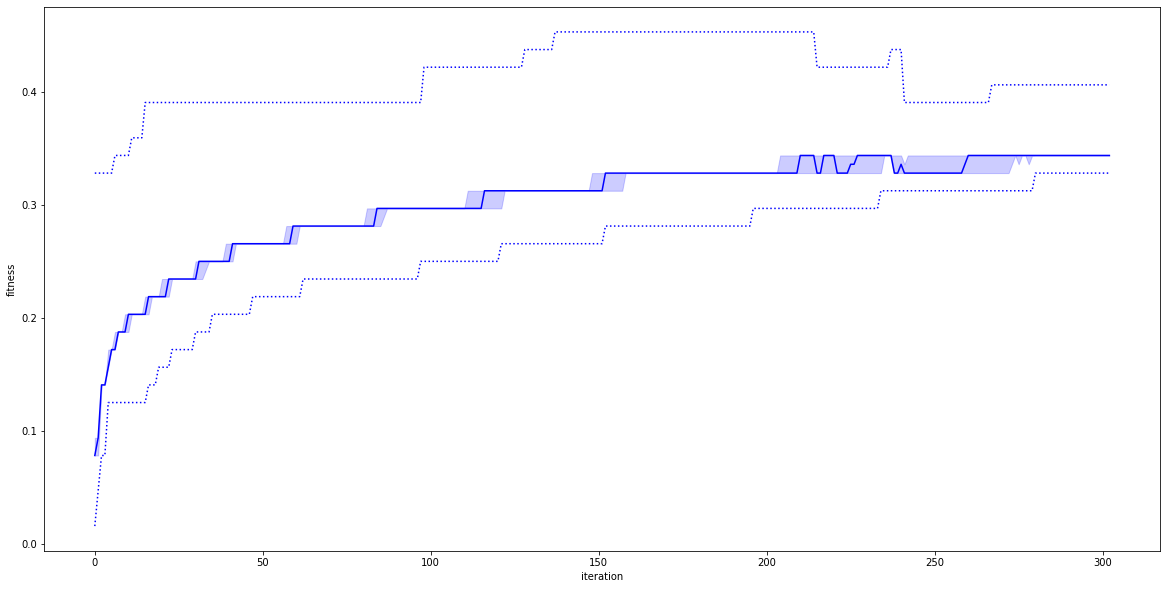

In [4]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=par_fit_data,x="iteration",y="fitness",estimator=np.median,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')



In [5]:
parent_descs = []
for folder in os.listdir(exp_folder):
    print(folder)
    parent_ids = df.load_parent_pool(exp_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_descriptor(exp_folder + "/" + folder + "/morph_features.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])


meim_22_3_10-26-37-7769-2279963877
meim_22_3_10-26-40-740-2350202888
meim_22_3_10-26-45-5733-2586739213
meim_22_3_10-26-48-8775-3296345534
meim_22_3_10-26-48-8808-648423813
meim_22_3_10-26-51-1735-2541492157
meim_22_3_10-27-0-446-409001623
meim_22_3_16-46-47-7376-4018957153


/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x1440 with 0 Axes>

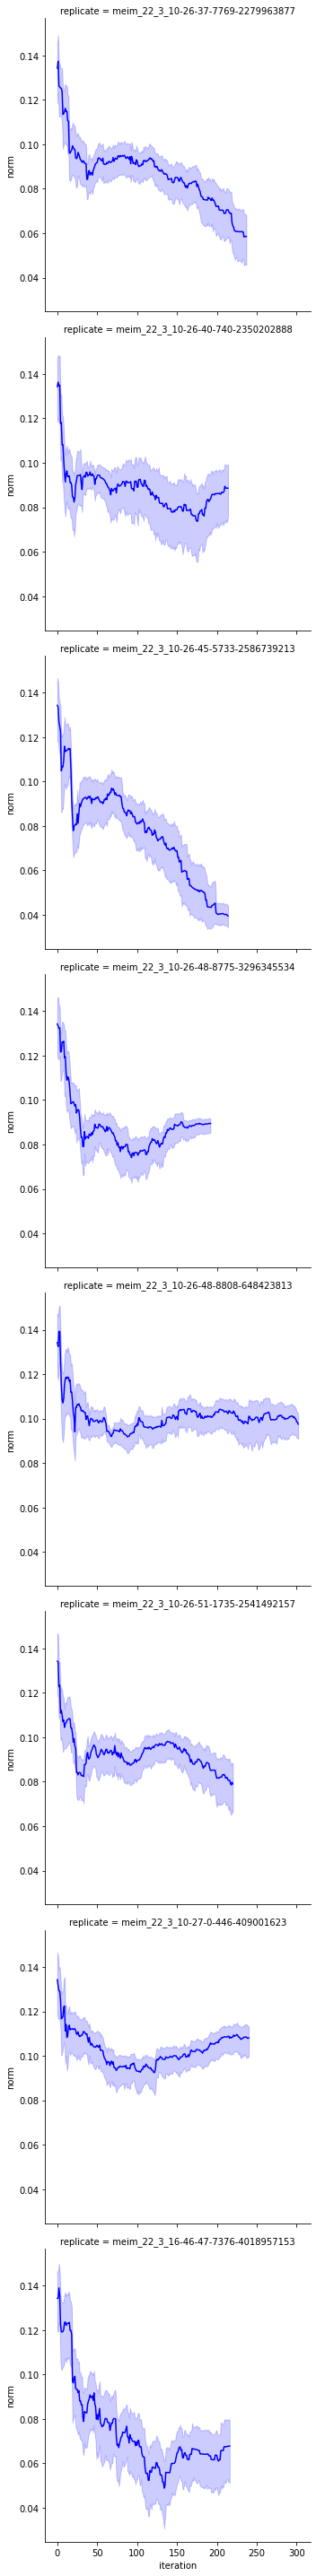

In [7]:
fig = plt.gcf()
fig.set_size_inches(40,20)
ax = sns.relplot(data=par_desc_data,kind="line",x="iteration",y="norm",estimator=np.std,color='b',row="replicate")

In [8]:
new_data_list = []
for rep in par_desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = par_desc_data.loc[par_desc_data["replicate"]==rep]
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)


meim_22_3_10-26-37-7769-2279963877
meim_22_3_10-26-40-740-2350202888
meim_22_3_10-26-45-5733-2586739213
meim_22_3_10-26-48-8775-3296345534
meim_22_3_10-26-48-8808-648423813
meim_22_3_10-26-51-1735-2541492157
meim_22_3_10-27-0-446-409001623
meim_22_3_16-46-47-7376-4018957153


In [9]:
#std_data.reset_index()
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index  number new inds     width     depth    height  \
0             0    59.999370              0.0  0.083648  0.084653  0.111436   
1             1    72.725422              0.0  0.085624  0.085478  0.110240   
2             2    78.299789              0.0  0.071787  0.067596  0.104831   
3             3    79.450560              0.0  0.070796  0.066999  0.106152   
4             4    85.422174              0.0  0.059241  0.060142  0.106733   
...         ...          ...              ...       ...       ...       ...   
1838        212  3280.844382              0.0  0.010411  0.016524  0.030822   
1839        213  3309.398210              0.0  0.010411  0.016524  0.030822   
1840        214  3336.323147              0.0  0.010411  0.016524  0.031165   
1841        215  3362.501228              0.0  0.010711  0.016524  0.031165   
1842        216  3388.882061              0.0  0.010711  0.016524  0.031165   

        voxels    wheels  sensors    joints   caste

Text(0, 0.5, 'Morphological diversity')

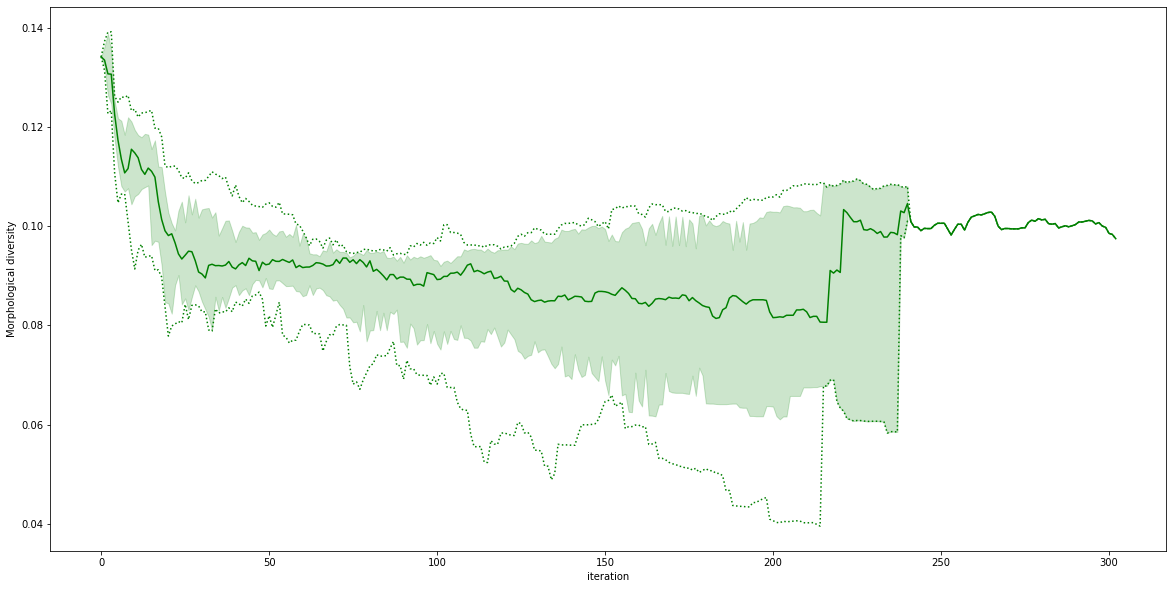

In [10]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",estimator=np.median,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.max,ci=None,color='g')
sns.lineplot(data=std_data,x="iteration",y="norm",linestyle=":",estimator=np.min,ci=None,color='g')
ax.set_ylabel("Morphological diversity")

# MEIM vs MEFC

In [4]:
meim_folder = "/media/leni/DATADRIVE1/are-logs/meim/"
mefc_folder = "/media/leni/DATADRIVE1/are-logs/mefc/"

## Fitness Values


In [9]:
parent_fits = []
for folder in os.listdir(meim_folder):
    print(folder)
    parent_ids = df.load_parent_pool(meim_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = df.load_fitness(meim_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individual","number new inds","parent 1","parent 2","fitness","replicate"])
par_fit_data["controller_type"] = "Homeokinesis"


meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


In [8]:
parent_fits = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_ids = df.load_parent_pool(mefc_folder + "/" + folder + "/parents_pool.csv")
    ids, parents, fitnesses, evals, deltas = df.load_fitness(mefc_folder + "/" + folder + "/fitness.csv")
    fits = [[i,p[0],p[1],f,folder] for i, p, f in zip(ids,parents,fitnesses)]
    parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data2 = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","discretized number of robots","number of individual","number new inds","parent 1","parent 2","fitness","replicate"])
par_fit_data2["controller_type"] = "Fixed Controller"


meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619
meim_29_4_23-26-10-962-312197336
meim_29_4_23-3-27-7879-438409473
meim_30_4_2-47-50-415-2295905252
meim_30_4_3-22-55-5279-1110769008
meim_30_4_4-16-15-5993-3911015035
meim_30_4_8-18-32-2377-2908989017
meim_31_4_10-25-17-7843-2649367498
meim_31_4_12-15-41-1790-1095944290


In [10]:
fit_data = pd.concat([par_fit_data,par_fit_data2]).reset_index(drop=True)
print(fit_data)

        iteration  robot index  discretized number of robots  \
0               0           26                           250   
1               0           59                           250   
2               0           22                           250   
3               0           48                           250   
4               0           51                           250   
...           ...          ...                           ...   
950795        212        10163                         10000   
950796        212        10245                         10000   
950797        212        10263                         10000   
950798        212        10256                         10000   
950799        212        10324                         10000   

        number of individual  number new inds  parent 1  parent 2   fitness  \
0                        242              100        -1        -1  0.046875   
1                        242              100        -1        -1  0.0625

<Axes: xlabel='iteration', ylabel='fitness'>

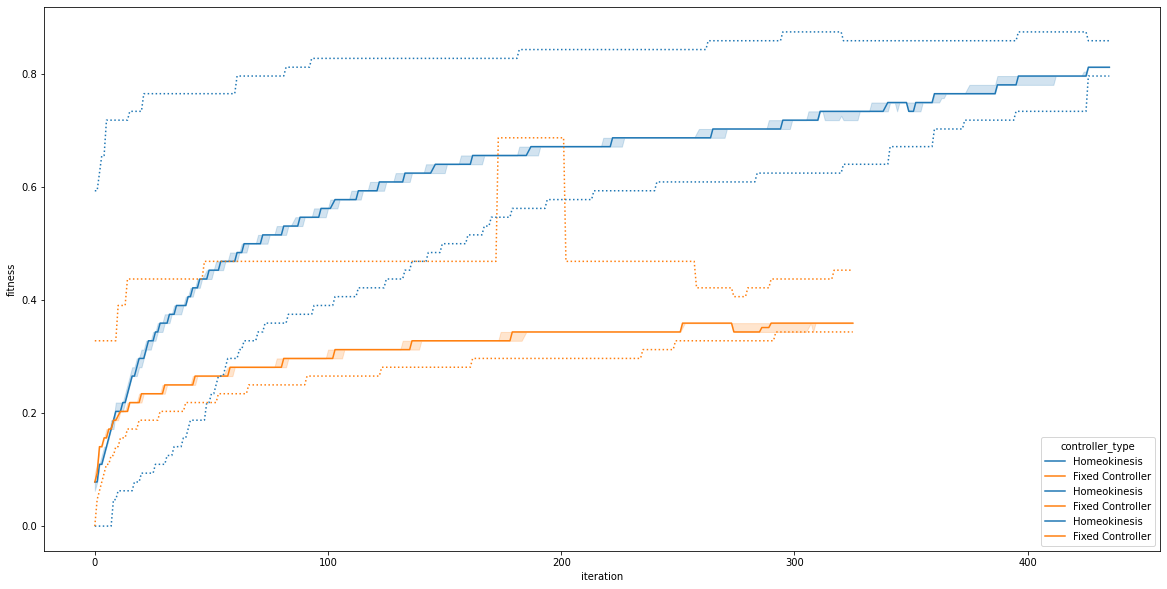

In [11]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller_type",estimator=np.median,color='b')
sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller_type",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=fit_data,x="iteration",y="fitness",hue="controller_type",linestyle=":",estimator=np.min,ci=None,color='b')



Text(0.5, 0, 'number of robots')

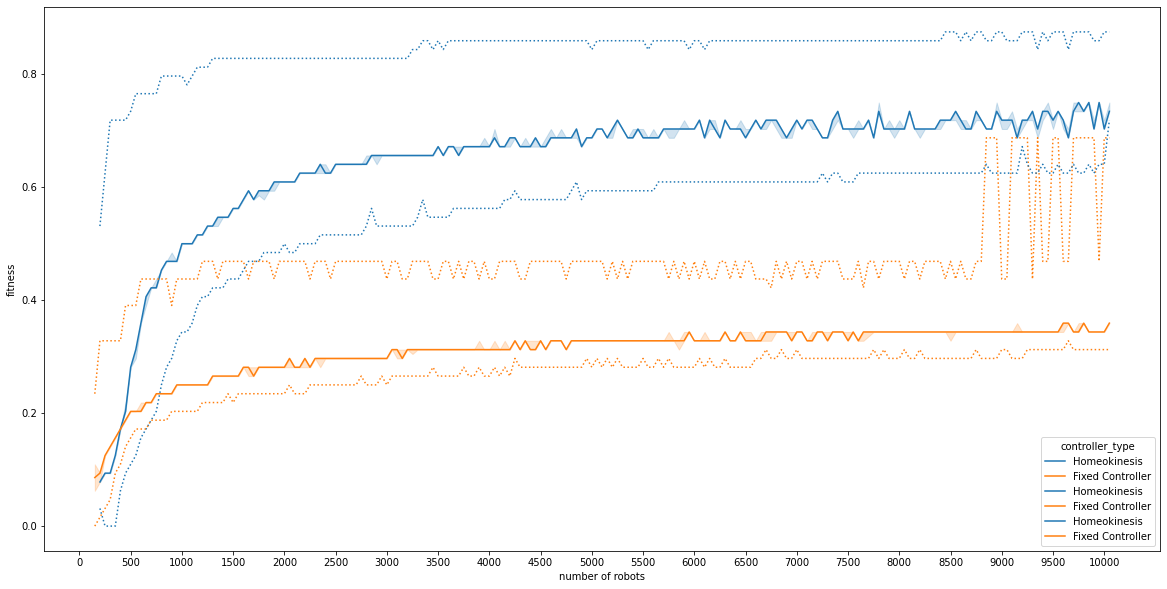

In [12]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller_type",estimator=np.median,color='b')
sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller_type",linestyle=":",estimator=np.max,ci=None,color='b')
sns.lineplot(data=fit_data,x="discretized number of robots",y="fitness",hue="controller_type",linestyle=":",estimator=np.min,ci=None,color='b')
ax.set_xticks(range(0,10500,500))
ax.set_xlabel("number of robots")

## Diversity
### Feature descriptor

In [48]:
parent_descs = []
for folder in os.listdir(meim_folder):
    print(folder)
    parent_ids = df.load_parent_pool(meim_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_feature_descriptor(meim_folder + "/" + folder + "/morph_features.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])
par_desc_data["controller_type"] = "Homeokinesis"

meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


In [49]:
parent_descs = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_ids = df.load_parent_pool(mefc_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_feature_descriptor(mefc_folder + "/" + folder + "/morph_features.csv")
    descs = [d +[folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","width","depth","height","voxels","wheels","sensors","joints","casters","norm","replicate"])
par_desc_data2["controller_type"] = "Fixed Controller"

meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-672-3845513273
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619


In [50]:
desc_data = pd.concat([par_desc_data,par_desc_data2]).reset_index(drop=True)
print(desc_data)

        iteration  robot index  discretized number of robots  \
0               0           26                           250   
1               0           59                           250   
2               0           22                           250   
3               0           48                           250   
4               0           51                           250   
...           ...          ...                           ...   
713895        134         3653                          3500   
713896        134         3626                          3500   
713897        134         3631                          3500   
713898        134         3728                          3500   
713899        134         3774                          3500   

        number of individuals  number new inds     width     depth    height  \
0                         242              100  0.162182  0.179999  0.419636   
1                         242              100  0.180001  0.162184  0.1

In [51]:
new_data_list = []
for rep in desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = desc_data.loc[desc_data["replicate"]==rep]
    ctrl_type = tmp_data["controller_type"].drop_duplicates().values[0]
    print(ctrl_type)
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data["controller_type"] = ctrl_type
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)

meim_16_3_16-56-39-9868-18373300
Homeokinesis
meim_16_3_16-56-42-2870-2796053236
Homeokinesis
meim_16_3_16-56-45-5895-1777546940
Homeokinesis
meim_16_3_16-56-45-5917-957574002
Homeokinesis
meim_16_3_16-56-48-8931-985534567
Homeokinesis
meim_16_3_16-56-48-8936-2561894498
Homeokinesis
meim_16_3_16-56-51-1885-639115363
Homeokinesis
meim_16_3_17-8-55-5548-2215134775
Homeokinesis
meim_17_3_11-31-49-9733-2516969209
Homeokinesis
meim_17_3_11-37-2-2832-3966900741
Homeokinesis
meim_18_3_11-38-15-5621-745283126
Homeokinesis
meim_18_3_11-38-18-8916-724015239
Homeokinesis
meim_18_3_11-38-21-1936-3632418103
Homeokinesis
meim_18_3_11-38-24-4661-1432447149
Homeokinesis
meim_18_3_11-38-27-7900-2266432585
Homeokinesis
meim_18_3_11-38-30-917-761405749
Homeokinesis
meim_18_3_15-22-21-1418-481348034
Homeokinesis
meim_18_3_15-22-51-1987-1456279332
Homeokinesis
meim_28_4_11-28-51-1443-4031853478
Fixed Controller
meim_28_4_11-28-54-4846-1358932079
Fixed Controller
meim_28_4_11-28-57-7608-3617091664
Fixed Con

In [52]:
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index  discretized number of robots  \
0             0    66.250558                           0.0   
1             1    72.039054                           0.0   
2             2    75.375967                           0.0   
3             3    77.263746                           0.0   
4             4    78.657197                           0.0   
...         ...          ...                           ...   
7134        130   806.978273                           0.0   
7135        131   810.332854                           0.0   
7136        132   824.625327                           0.0   
7137        133   831.526666                           0.0   
7138        134   838.953893                           0.0   

      number of individuals  number new inds     width     depth    height  \
0                       0.0              0.0  0.126623  0.122700  0.154484   
1                       0.0              0.0  0.126623  0.122700  0.154484   
2                    

Text(0, 0.5, 'Morphological diversity')

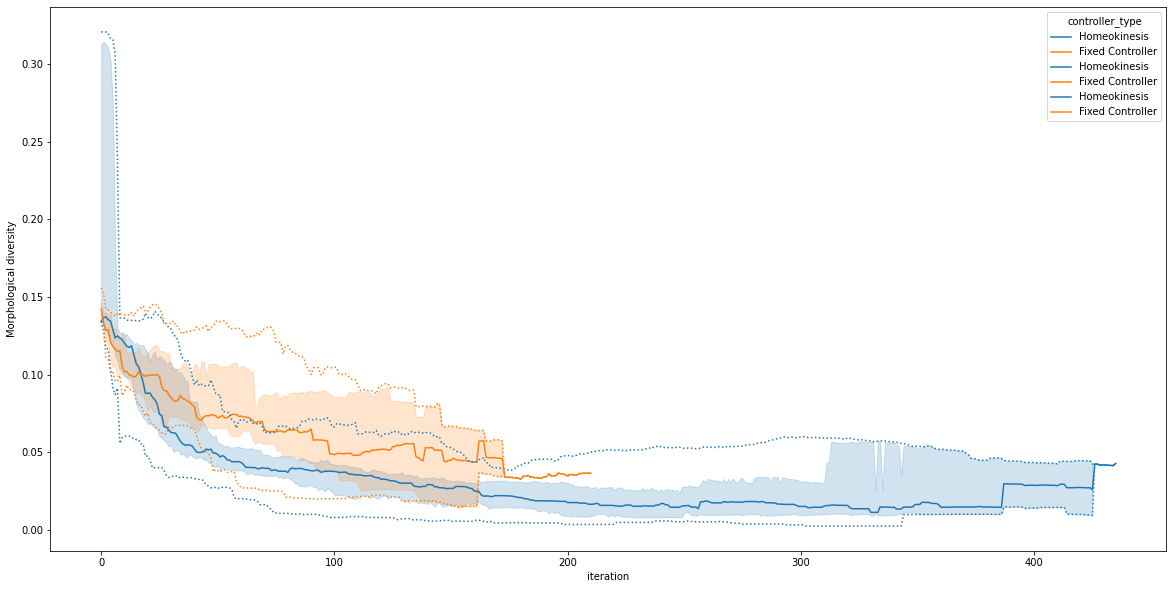

In [53]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller_type",estimator=np.median)
sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller_type",linestyle=":",estimator=np.max,ci=None)
sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller_type",linestyle=":",estimator=np.min,ci=None)
ax.set_ylabel("Morphological diversity")

In [54]:
new_data_list = []
for rep in desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = desc_data.loc[desc_data["replicate"]==rep]
    ctrl_type = tmp_data["controller_type"].drop_duplicates().values[0]
    print(ctrl_type)
    for iter in tmp_data["discretized number of robots"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["discretized number of robots"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["discretized number of robots"] = iter
        new_data["controller_type"] = ctrl_type
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

meim_16_3_16-56-39-9868-18373300
Homeokinesis
meim_16_3_16-56-42-2870-2796053236
Homeokinesis
meim_16_3_16-56-45-5895-1777546940
Homeokinesis
meim_16_3_16-56-45-5917-957574002
Homeokinesis
meim_16_3_16-56-48-8931-985534567
Homeokinesis
meim_16_3_16-56-48-8936-2561894498
Homeokinesis
meim_16_3_16-56-51-1885-639115363
Homeokinesis
meim_16_3_17-8-55-5548-2215134775
Homeokinesis
meim_17_3_11-31-49-9733-2516969209
Homeokinesis
meim_17_3_11-37-2-2832-3966900741
Homeokinesis
meim_18_3_11-38-15-5621-745283126
Homeokinesis
meim_18_3_11-38-18-8916-724015239
Homeokinesis
meim_18_3_11-38-21-1936-3632418103
Homeokinesis
meim_18_3_11-38-24-4661-1432447149
Homeokinesis
meim_18_3_11-38-27-7900-2266432585
Homeokinesis
meim_18_3_11-38-30-917-761405749
Homeokinesis
meim_18_3_15-22-21-1418-481348034
Homeokinesis
meim_18_3_15-22-51-1987-1456279332
Homeokinesis
meim_28_4_11-28-51-1443-4031853478
Fixed Controller
meim_28_4_11-28-54-4846-1358932079
Fixed Controller
meim_28_4_11-28-57-7608-3617091664
Fixed Con

Text(0, 0.5, 'Morphological diversity')

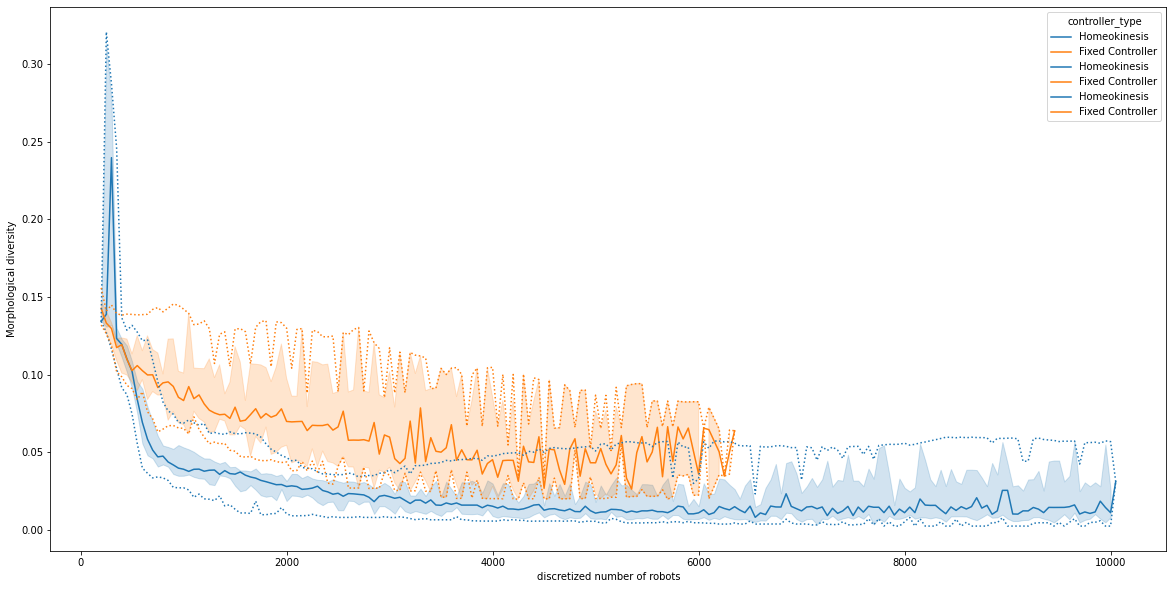

In [55]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="discretized number of robots",y="norm",hue="controller_type",estimator=np.median)
sns.lineplot(data=std_data,x="discretized number of robots",y="norm",hue="controller_type",linestyle=":",estimator=np.max,ci=None)
sns.lineplot(data=std_data,x="discretized number of robots",y="norm",hue="controller_type",linestyle=":",estimator=np.min,ci=None)
ax.set_ylabel("Morphological diversity")

### Organ-Matrix Descriptor


In [56]:
parent_descs = []
for folder in os.listdir(meim_folder):
    print(folder)
    parent_ids = df.load_parent_pool(meim_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_component_descriptor(meim_folder + "/" + folder + "/morph_descriptor.csv")
    
    descs = [[d[0],d[-1],folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","norm","replicate"])
par_desc_data["controller_type"] = "Homeokinesis"

meim_16_3_16-56-39-9868-18373300
meim_16_3_16-56-42-2870-2796053236
meim_16_3_16-56-45-5895-1777546940
meim_16_3_16-56-45-5917-957574002
meim_16_3_16-56-48-8931-985534567
meim_16_3_16-56-48-8936-2561894498
meim_16_3_16-56-51-1885-639115363
meim_16_3_17-8-55-5548-2215134775
meim_17_3_11-31-49-9733-2516969209
meim_17_3_11-37-2-2832-3966900741
meim_18_3_11-38-15-5621-745283126
meim_18_3_11-38-18-8916-724015239
meim_18_3_11-38-21-1936-3632418103
meim_18_3_11-38-24-4661-1432447149
meim_18_3_11-38-27-7900-2266432585
meim_18_3_11-38-30-917-761405749
meim_18_3_15-22-21-1418-481348034
meim_18_3_15-22-51-1987-1456279332


In [57]:
parent_descs = []
for folder in os.listdir(mefc_folder):
    print(folder)
    parent_ids = df.load_parent_pool(mefc_folder + "/" + folder + "/parents_pool.csv")
    descriptors = df.load_component_descriptor(mefc_folder + "/" + folder + "/morph_descriptor.csv")
    
    descs = [[d[0],d[-1],folder] for d in descriptors]
    parent_descs += df.filter_to_parent_pool(descs,parent_ids)

par_desc_data2 = pd.DataFrame(data=parent_descs,columns=["iteration","robot index","discretized number of robots","number of individuals","number new inds","norm","replicate"])
par_desc_data2["controller_type"] = "Fixed Controller"

meim_28_4_11-28-51-1443-4031853478
meim_28_4_11-28-54-4846-1358932079
meim_28_4_11-28-57-7608-3617091664
meim_28_4_11-29-0-672-3845513273
meim_28_4_11-29-0-857-3681298804
meim_28_4_11-29-9-9642-416726483
meim_28_4_14-31-44-4230-3598983178
meim_28_4_19-42-29-9901-1413909619


In [58]:
desc_data = pd.concat([par_desc_data,par_desc_data2]).reset_index(drop=True)
print(desc_data)

        iteration  robot index  discretized number of robots  \
0               0           26                           250   
1               0           59                           250   
2               0           22                           250   
3               0           48                           250   
4               0           51                           250   
...           ...          ...                           ...   
713895        134         3653                          3500   
713896        134         3626                          3500   
713897        134         3631                          3500   
713898        134         3728                          3500   
713899        134         3774                          3500   

        number of individuals  number new inds       norm  \
0                         242              100   1.000000   
1                         242              100   1.000000   
2                         242              100  

In [59]:
new_data_list = []
for rep in desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = desc_data.loc[desc_data["replicate"]==rep]
    ctrl_type = tmp_data["controller_type"].drop_duplicates().values[0]
    print(ctrl_type)
    for iter in tmp_data["iteration"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["iteration"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["iteration"] = iter
        new_data["controller_type"] = ctrl_type
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)

meim_16_3_16-56-39-9868-18373300
Homeokinesis
meim_16_3_16-56-42-2870-2796053236
Homeokinesis
meim_16_3_16-56-45-5895-1777546940
Homeokinesis
meim_16_3_16-56-45-5917-957574002
Homeokinesis
meim_16_3_16-56-48-8931-985534567
Homeokinesis
meim_16_3_16-56-48-8936-2561894498
Homeokinesis
meim_16_3_16-56-51-1885-639115363
Homeokinesis
meim_16_3_17-8-55-5548-2215134775
Homeokinesis
meim_17_3_11-31-49-9733-2516969209
Homeokinesis
meim_17_3_11-37-2-2832-3966900741
Homeokinesis
meim_18_3_11-38-15-5621-745283126
Homeokinesis
meim_18_3_11-38-18-8916-724015239
Homeokinesis
meim_18_3_11-38-21-1936-3632418103
Homeokinesis
meim_18_3_11-38-24-4661-1432447149
Homeokinesis
meim_18_3_11-38-27-7900-2266432585
Homeokinesis
meim_18_3_11-38-30-917-761405749
Homeokinesis
meim_18_3_15-22-21-1418-481348034
Homeokinesis
meim_18_3_15-22-51-1987-1456279332
Homeokinesis
meim_28_4_11-28-51-1443-4031853478
Fixed Controller
meim_28_4_11-28-54-4846-1358932079
Fixed Controller
meim_28_4_11-28-57-7608-3617091664
Fixed Con

In [60]:
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

      iteration  robot index  discretized number of robots  \
0             0    66.250558                           0.0   
1             1    72.039054                           0.0   
2             2    75.375967                           0.0   
3             3    77.263746                           0.0   
4             4    78.657197                           0.0   
...         ...          ...                           ...   
7134        130   806.978273                           0.0   
7135        131   810.332854                           0.0   
7136        132   824.625327                           0.0   
7137        133   831.526666                           0.0   
7138        134   838.953893                           0.0   

      number of individuals  number new inds      norm  \
0                       0.0              0.0  3.613594   
1                       0.0              0.0  3.613594   
2                       0.0              0.0  3.613594   
3                      

Text(0, 0.5, 'Morphological diversity')

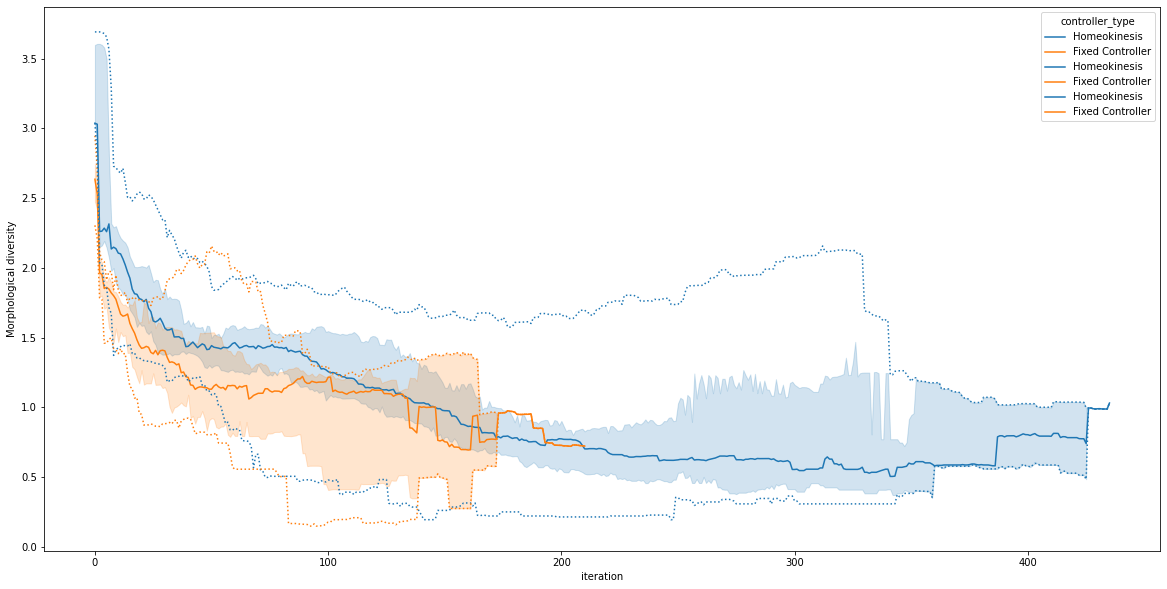

In [61]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller_type",estimator=np.median)
sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller_type",linestyle=":",estimator=np.max,ci=None)
sns.lineplot(data=std_data,x="iteration",y="norm",hue="controller_type",linestyle=":",estimator=np.min,ci=None)
ax.set_ylabel("Morphological diversity")

In [62]:
new_data_list = []
for rep in desc_data["replicate"].drop_duplicates():
    print(rep)
    tmp_data = desc_data.loc[desc_data["replicate"]==rep]
    ctrl_type = tmp_data["controller_type"].drop_duplicates().values[0]
    print(ctrl_type)
    for iter in tmp_data["discretized number of robots"].drop_duplicates():
        tmp_data2 = tmp_data.loc[tmp_data["discretized number of robots"] == iter]
        new_data = pd.DataFrame(tmp_data2.std(numeric_only=True)).transpose()
        new_data.reset_index()
        new_data["replicate"] = rep
        new_data["discretized number of robots"] = iter
        new_data["controller_type"] = ctrl_type
        new_data_list.append(new_data)

std_data = pd.concat(new_data_list)
std_data.index  = [i for i in range(len(std_data))]
print(std_data)

meim_16_3_16-56-39-9868-18373300
Homeokinesis
meim_16_3_16-56-42-2870-2796053236
Homeokinesis
meim_16_3_16-56-45-5895-1777546940
Homeokinesis
meim_16_3_16-56-45-5917-957574002
Homeokinesis
meim_16_3_16-56-48-8931-985534567
Homeokinesis
meim_16_3_16-56-48-8936-2561894498
Homeokinesis
meim_16_3_16-56-51-1885-639115363
Homeokinesis
meim_16_3_17-8-55-5548-2215134775
Homeokinesis
meim_17_3_11-31-49-9733-2516969209
Homeokinesis
meim_17_3_11-37-2-2832-3966900741
Homeokinesis
meim_18_3_11-38-15-5621-745283126
Homeokinesis
meim_18_3_11-38-18-8916-724015239
Homeokinesis
meim_18_3_11-38-21-1936-3632418103
Homeokinesis
meim_18_3_11-38-24-4661-1432447149
Homeokinesis
meim_18_3_11-38-27-7900-2266432585
Homeokinesis
meim_18_3_11-38-30-917-761405749
Homeokinesis
meim_18_3_15-22-21-1418-481348034
Homeokinesis
meim_18_3_15-22-51-1987-1456279332
Homeokinesis
meim_28_4_11-28-51-1443-4031853478
Fixed Controller
meim_28_4_11-28-54-4846-1358932079
Fixed Controller
meim_28_4_11-28-57-7608-3617091664
Fixed Con

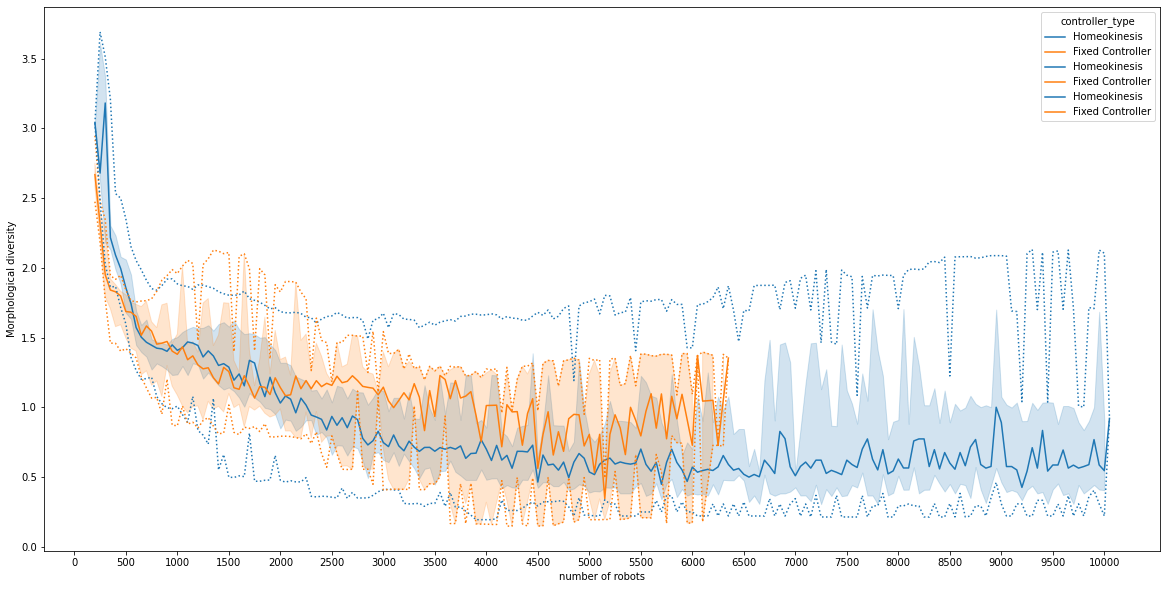

In [63]:
fig = plt.gcf()
fig.set_size_inches(20,10)
ax = sns.lineplot(data=std_data,x="discretized number of robots",y="norm",hue="controller_type",estimator=np.median)
sns.lineplot(data=std_data,x="discretized number of robots",y="norm",hue="controller_type",linestyle=":",estimator=np.max,ci=None)
sns.lineplot(data=std_data,x="discretized number of robots",y="norm",hue="controller_type",linestyle=":",estimator=np.min,ci=None)
ax.set_ylabel("Morphological diversity")
ax.set_xlabel("number of robots")
ax.set_xticks(range(0,10500,500))

## Pareto Front

In [72]:
pareto_datas = []
for folder in os.listdir(mefc_folder):
    if(folder.split("_")[0] != "meim"):
        continue
    exp_folder = mefc_folder + "/" + folder
    pareto_set = pd.read_csv(exp_folder + "/pareto_set_complete.csv")
    pareto_set["replicate"] = folder
    pareto_set["controller type"] = "Fixed Controller"
    pareto_datas.append(pareto_set)

pareto_data = pd.concat(pareto_datas)
pareto_data = pareto_data.reset_index(drop=True)
print(pareto_data)

     fitness  sparsity    id                           replicate  \
0   0.250000  9.066667   800  meim_28_4_11-28-51-1443-4031853478   
1   0.406250  0.200000  1674  meim_28_4_11-28-51-1443-4031853478   
2   0.421875  0.133333  1870  meim_28_4_11-28-51-1443-4031853478   
3   0.328125  8.333333  4846  meim_28_4_11-28-51-1443-4031853478   
4   0.140625  9.933333  5344  meim_28_4_11-28-51-1443-4031853478   
..       ...       ...   ...                                 ...   
66  0.203125  9.266667  2832  meim_28_4_19-42-29-9901-1413909619   
67  0.281250  9.200000  2909  meim_28_4_19-42-29-9901-1413909619   
68  0.343750  5.066667  3126  meim_28_4_19-42-29-9901-1413909619   
69  0.312500  6.266667  3290  meim_28_4_19-42-29-9901-1413909619   
70  0.328125  6.000000  3507  meim_28_4_19-42-29-9901-1413909619   

     controller type  
0   Fixed Controller  
1   Fixed Controller  
2   Fixed Controller  
3   Fixed Controller  
4   Fixed Controller  
..               ...  
66  Fixed Controller  

In [73]:
print(pareto_data.iloc[pareto_data["fitness"].idxmax()])

fitness                                        0.4375
sparsity                                     2.666667
id                                                567
replicate          meim_28_4_14-31-44-4230-3598983178
controller type                      Fixed Controller
Name: 55, dtype: object


<Axes: xlabel='sparsity', ylabel='fitness'>

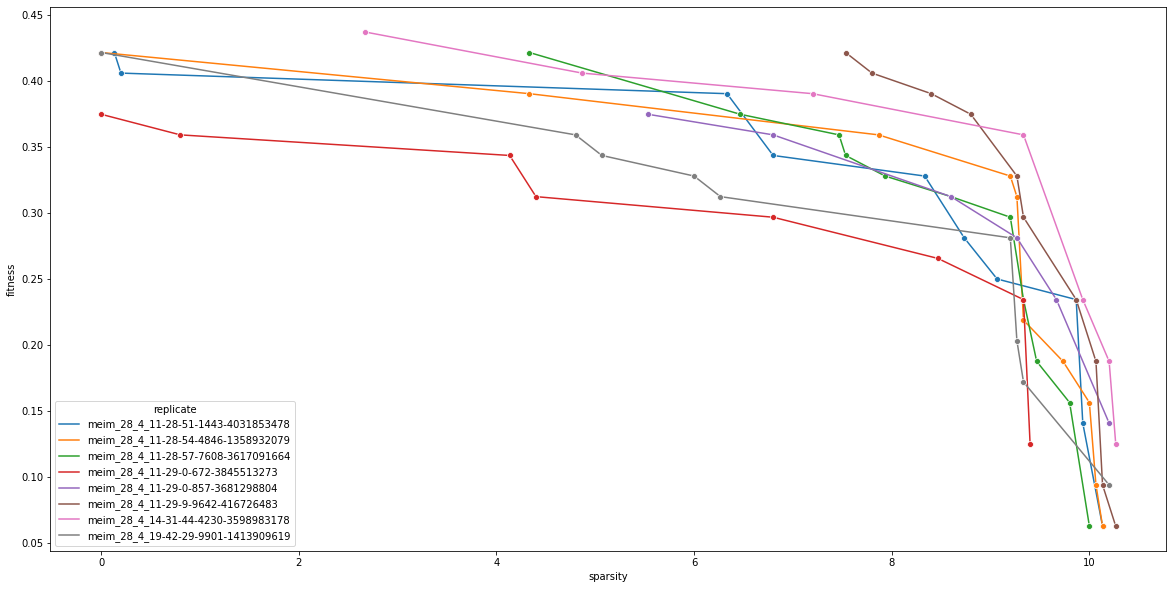

In [74]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=pareto_data,marker="o",x="sparsity",y="fitness",hue="replicate")

In [79]:
pareto_datas = []
for folder in os.listdir(meim_folder):
    if(folder.split("_")[0] != "meim"):
        continue
    exp_folder = meim_folder + "/" + folder
    pareto_set = pd.read_csv(exp_folder + "/pareto_set_complete.csv")
    pareto_set["replicate"] = folder
    pareto_set["controller type"] = "Homeokinesis"
    pareto_datas.append(pareto_set)

pareto_data2 = pd.concat(pareto_datas)
pareto_data2 = pareto_data2.reset_index(drop=True)
print(pareto_data2)

      fitness   sparsity     id                           replicate  \
0    0.046875  10.133333    123    meim_16_3_16-56-39-9868-18373300   
1    0.140625   9.266667   3051    meim_16_3_16-56-39-9868-18373300   
2    0.750000   0.866667   3079    meim_16_3_16-56-39-9868-18373300   
3    0.281250   8.400000   3141    meim_16_3_16-56-39-9868-18373300   
4    0.328125   8.200000   3626    meim_16_3_16-56-39-9868-18373300   
..        ...        ...    ...                                 ...   
238  0.656250   1.800000   5544  meim_18_3_15-22-51-1987-1456279332   
239  0.234375   7.133333   7904  meim_18_3_15-22-51-1987-1456279332   
240  0.781250   0.000000   8853  meim_18_3_15-22-51-1987-1456279332   
241  0.187500   8.400000   9800  meim_18_3_15-22-51-1987-1456279332   
242  0.718750   1.266667  10222  meim_18_3_15-22-51-1987-1456279332   

    controller type  
0      Homeokinesis  
1      Homeokinesis  
2      Homeokinesis  
3      Homeokinesis  
4      Homeokinesis  
..             

In [80]:
print(pareto_data2.iloc[pareto_data2["fitness"].idxmax()])

fitness                                        0.875
sparsity                                    1.466667
id                                              9007
replicate          meim_18_3_11-38-15-5621-745283126
controller type                         Homeokinesis
Name: 143, dtype: object


<Axes: xlabel='sparsity', ylabel='fitness'>

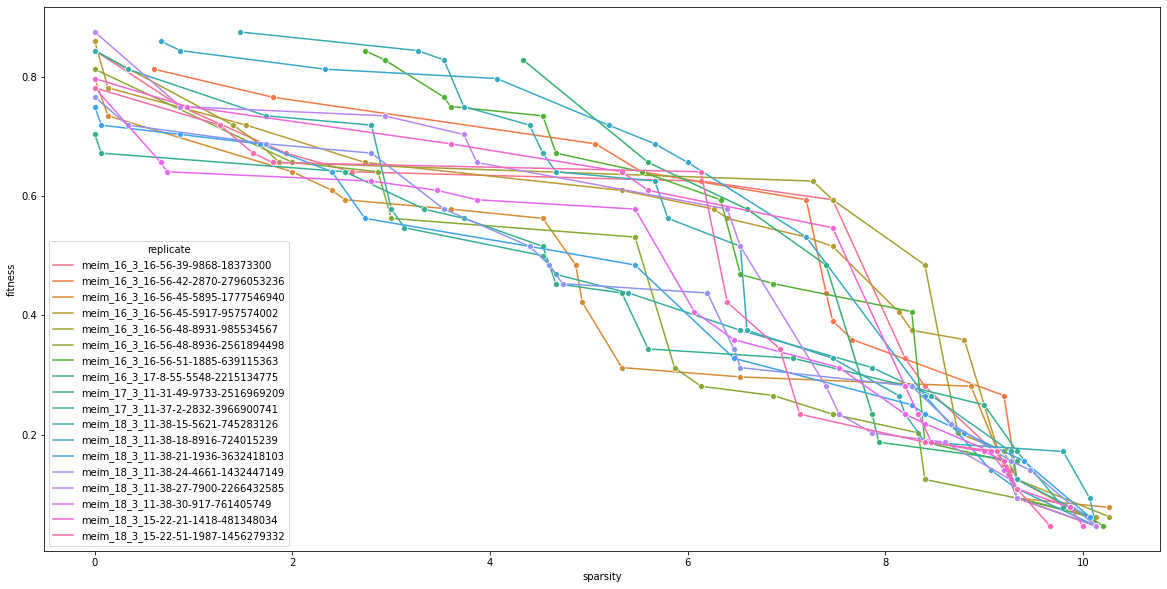

In [81]:
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.lineplot(data=pareto_data2,marker="o",x="sparsity",y="fitness",hue="replicate")

In [82]:
pareto_all_data = pd.concat([pareto_data,pareto_data2]).reset_index(drop=True)


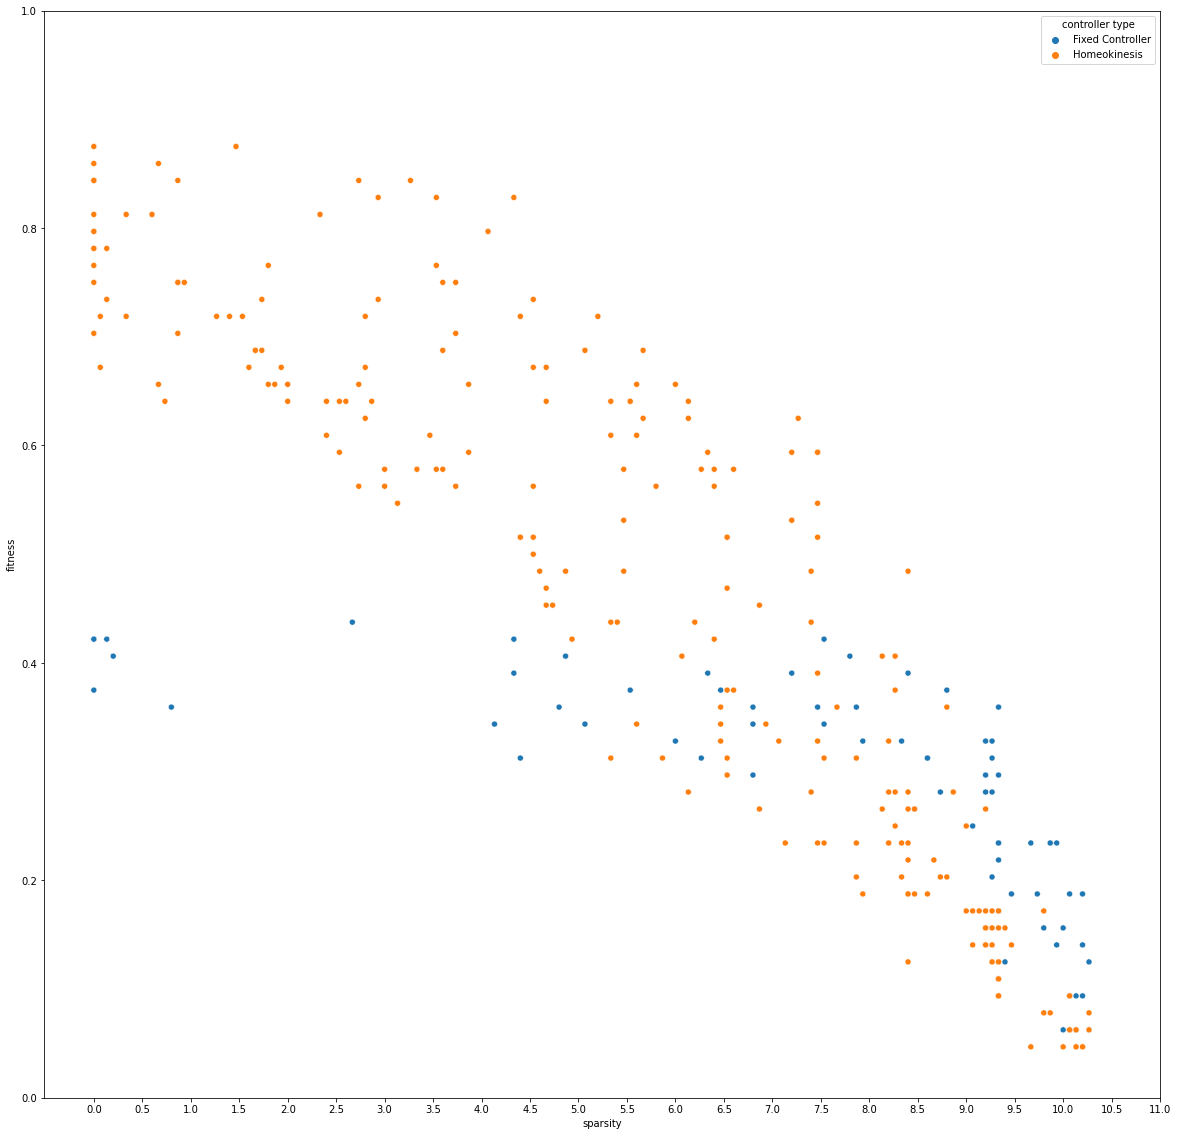

In [83]:
fig = plt.gcf()
fig.set_size_inches(20,20)
ax = sns.scatterplot(data=pareto_all_data,x="sparsity",y="fitness",hue="controller type")
ax.set_ylim([0,1])
ax.set_xticks(np.arange(0,11.5,0.5))

## Trajectory

In [28]:
traj = df.load_trajectory("/media/leni/DATADRIVE1/are-logs/mefc/meim_23_3_10-21-6-6642-2099145537/traj_10533")
traj_data = pd.DataFrame(data=traj,columns=["t","x","y","z"])

(-1.0, 1.0)

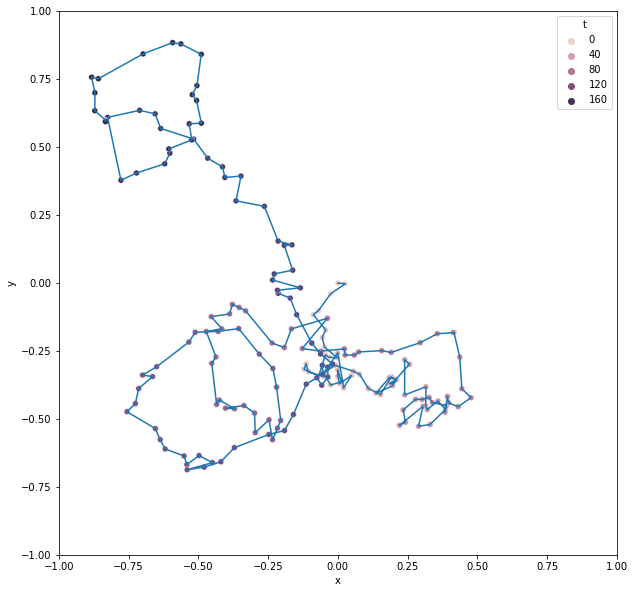

In [36]:
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = sns.lineplot(data=traj_data,x="x",y="y",sort=False)
sns.scatterplot(data=traj_data,x="x",y="y",hue="t")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

In [37]:
traj = df.load_trajectory("/media/leni/DATADRIVE1/are-logs/meim/meim_18_3_11-38-15-5621-745283126/traj_9007")
traj_data = pd.DataFrame(data=traj,columns=["t","x","y","z"])

(-1.0, 1.0)

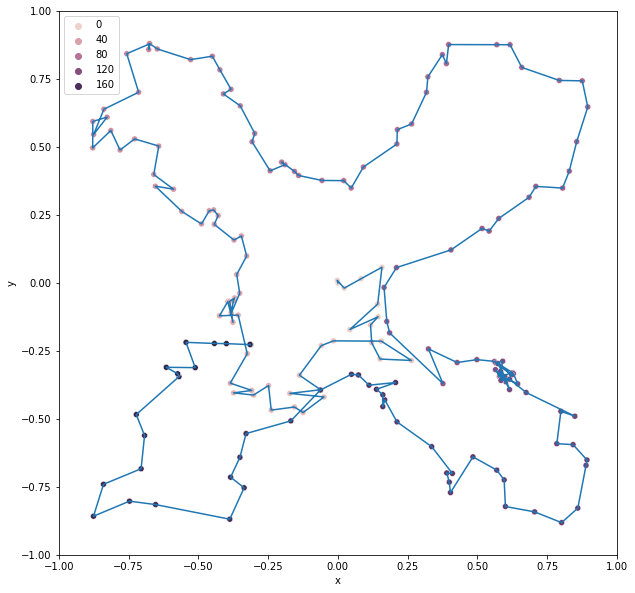

In [39]:
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.scatterplot(data=traj_data,x="x",y="y",hue="t")
ax = sns.lineplot(data=traj_data,x="x",y="y",sort=False)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])